# **Model Training**

## Objectives

* Create the Machine Learning model to predict healty and powdery mildew cherry leaves to answer business requirement 2.

## Inputs

* inputs/mildew_detection_in_cherry_leaves/cherry-leaves/test.
* inputs/mildew_detection_in_cherry_leaves/cherry-leaves/train.
* inputs/mildew_detection_in_cherry_leaves/cherry-leaves/validation.

## Outputs

* Image aumentation.
* Images distribution plot in train, validation, and test set.
* Create Machine learning model and training.
* Save model.
* Learning curve plot for model performance.
* Model evaluation
* Prediction of the random image file.

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 



---

## Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

## Set working directory

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/mildew-detection-in-cherry-leaves/jupyter_notebooks'

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/mildew-detection-in-cherry-leaves'

---

# Set input directories

Set train, validation and test paths.

In [5]:
my_data_dir = 'inputs/mildew_detection_in_cherry_leaves/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

---

# Set output directory

Create Output directory

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


### Set label names

In [7]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


---

# Resize Images

To avoid having a file bigger than 100mb to push in github, we are going to recize the all images from 256x256 to 100x100.

First we install scikit-image to use the resize function

In [8]:
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


Create loop trough the files and plot the new standard size

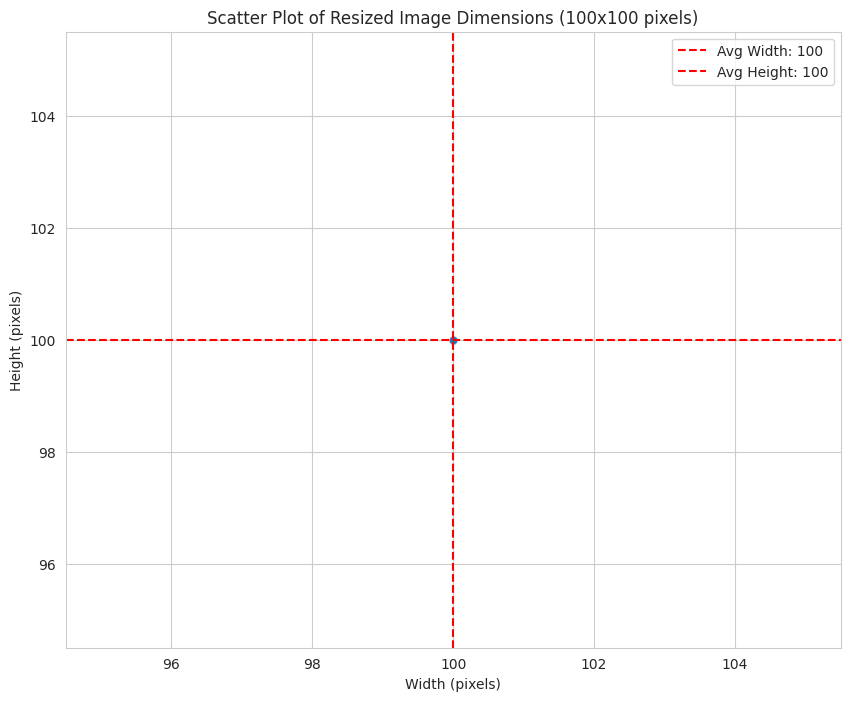

Resized Image Width: 100 pixels
Resized Image Height: 100 pixels


In [9]:
from skimage.transform import resize

# Create a dictionaty with all direcories
datasets = {
    'train': train_path,
    'test': train_path,
    'validation': val_path
}

# New size parameters
new_height, new_width = 100, 100

# New list of dimentions
dim1, dim2 = [], []

# Loop through each dataset to change the size
for dataset_name, dataset_path in datasets.items():
    # Loop through the labels
    labels = ['healthy', 'powdery_mildew']
    for label in labels:
        label_dir = os.path.join(dataset_path, label)
        for image_filename in os.listdir(label_dir):
            # Read the image
            img = imread(os.path.join(label_dir, image_filename))
            
            # Resize the image to 100x100 pixels
            img_resized = resize(img, (new_height, new_width), anti_aliasing=True)
            
            # Store the new dimensions (which will always be 100x100)
            d1, d2, colors = img_resized.shape
            dim1.append(d1)  # image height
            dim2.append(d2)  # image width

# Create scatterplot of resized image dimensions
sns.set_style("whitegrid")
fig, axes = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=dim1, y=dim2, alpha=0.2)

# Set axis labels
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")

# Compute and plot mean width and height lines
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean, color='r', linestyle='--', label=f'Avg Width: {dim1_mean}')
axes.axhline(y=dim2_mean, color='r', linestyle='--', label=f'Avg Height: {dim2_mean}')
plt.legend()

# Show the plot
plt.title("Scatter Plot of Resized Image Dimensions (100x100 pixels)")
plt.show()

# Print the average dimensions (should always be 100x100)
print(f"Resized Image Width: {dim1_mean} pixels")
print(f"Resized Image Height: {dim2_mean} pixels")

New size

In [11]:
image_average_size = (dim1_mean, dim2_mean, 3)
image_average_size

(100, 100, 3)

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [10]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)


IndentationError: expected an indented block (1114530593.py, line 5)